In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# **Gathering the required libraries**

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date, timedelta, datetime

data = pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908.csv')

In [3]:
data.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [4]:
data.tail()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
5263,05/20/2009,06:30,"Near Madiun, Indonesia",Military - Indonesian Air Force,NaN,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112.0,98.0,2.0,"While on approach, the military transport cras..."
5264,05/26/2009,NaN,"Near Isiro, DemocratiRepubliCongo",Service Air,NaN,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.0,4.0,NaN,The cargo plane crashed while on approach to I...
5265,06/01/2009,00:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...
5266,06/07/2009,08:30,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,NaN,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,C-FJJR,424,1.0,1.0,0.0,The air ambulance crashed into hills while att...
5267,06/08/2009,NaN,"State of Arunachal Pradesh, India",Military - Indian Air Force,NaN,Mechuka for Jorhat,Antonov An-32,NaN,NaN,13.0,13.0,0.0,The military transport went missing while en r...


In [5]:
data.shape

(5268, 13)

# **Data Cleaning**

**Checking for missing values**

In [6]:
data.isnull().sum()

Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1706
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64

**Through inspection, we found that missing values are present but employing feature engineering techniques and neglecting the features of less interest can result in good results.**

In [7]:
#cleanup
data['Time'] = data['Time'].replace(np.nan, '00:00') 
data['Time'] = data['Time'].str.replace('c: ', '')
data['Time'] = data['Time'].str.replace('c:', '')
data['Time'] = data['Time'].str.replace('c', '')
data['Time'] = data['Time'].str.replace('12\'20', '12:20')
data['Time'] = data['Time'].str.replace('18.40', '18:40')
data['Time'] = data['Time'].str.replace('0943', '09:43')
data['Time'] = data['Time'].str.replace('22\'08', '22:08')
data['Time'] = data['Time'].str.replace('114:20', '00:00')


data['Time'] = data['Date'] + ' ' + data['Time'] #joining two rows
def todate(x):
    return datetime.strptime(x, '%m/%d/%Y %H:%M')
data['Time'] = data['Time'].apply(todate) #convert to date type
print('Date ranges from ' + str(data.Time.min()) + ' to ' + str(data.Time.max())) 

data.Operator = data.Operator.str.upper() #to avoid duplicates.

Date ranges from 1908-09-17 17:18:00 to 2009-06-08 00:00:00


C:\Users\slili\AppData\Local\Temp\ipykernel_35236\774060710.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Time'] = data['Time'].str.replace('18.40', '18:40')


# **Visualizing the Data**

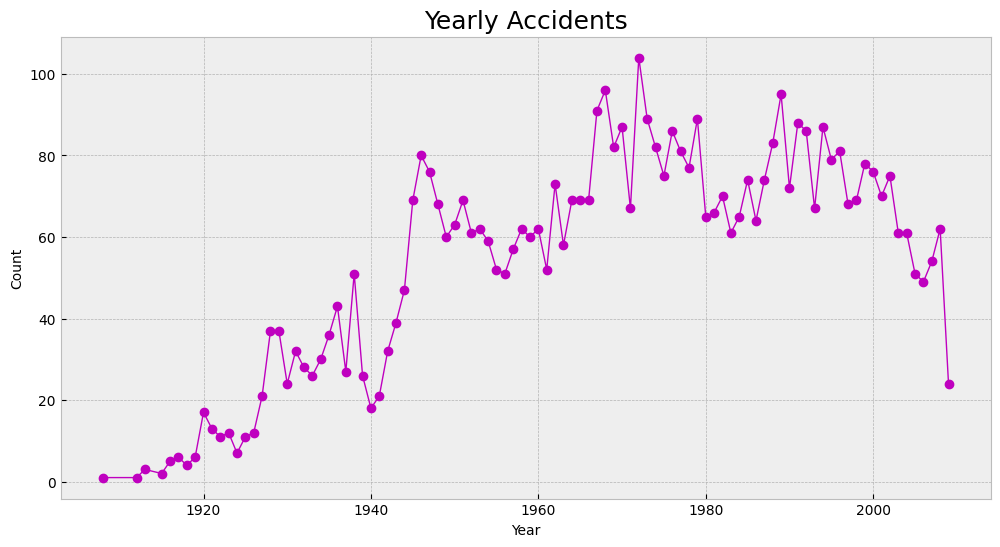

In [8]:
Temp = data.groupby(data.Time.dt.year)[['Date']].count()
Temp = Temp.rename(columns={"Date": "Count"})

plt.figure(figsize=(12,6))
plt.style.use('bmh')
plt.plot(Temp.index, 'Count', data=Temp, color='m', marker = "o", linewidth=1)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Yearly Accidents', loc='Center', fontsize=18)
plt.show()

# **Military Vs Commericial Flights**

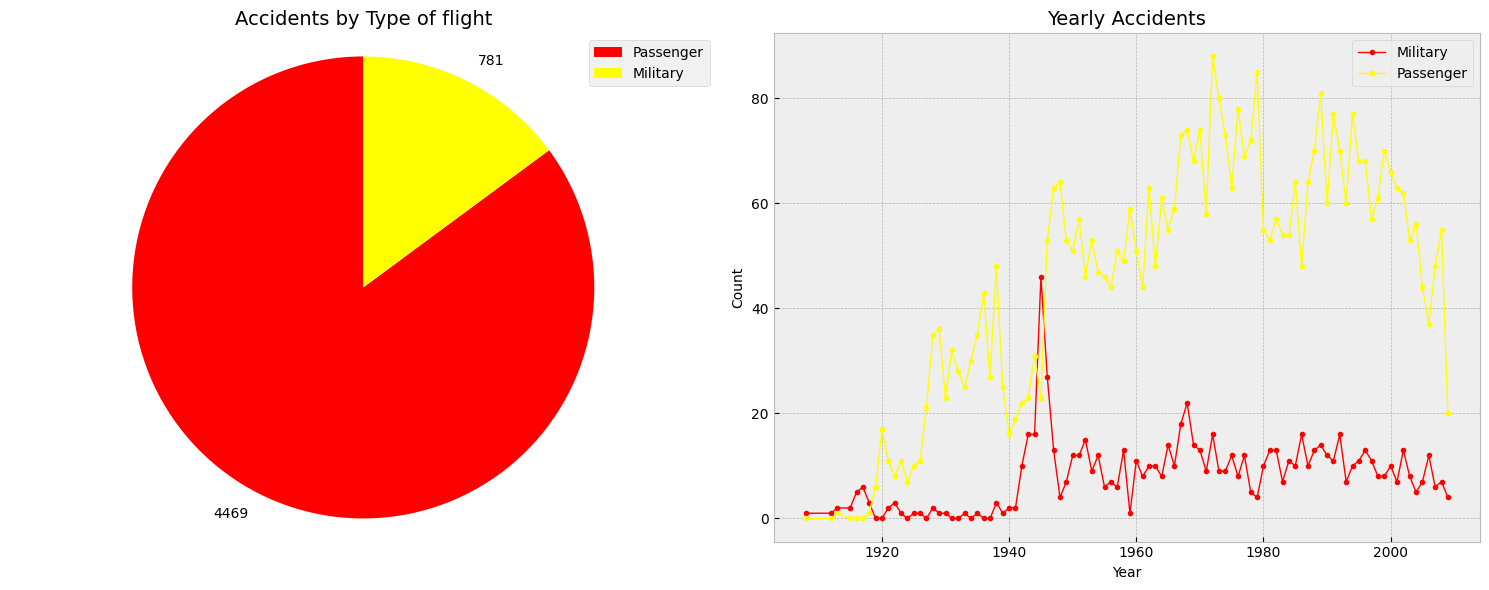

In [9]:
Temp = data.copy()
Temp['isMilitary'] = Temp.Operator.str.contains('MILITARY')
Temp = Temp.groupby('isMilitary')[['isMilitary']].count()
Temp.index = ['Passenger', 'Military']

Temp2 = data.copy()
Temp2['Military'] = Temp2.Operator.str.contains('MILITARY')
Temp2['Passenger'] = Temp2.Military == False
Temp2 = Temp2.loc[:, ['Time', 'Military', 'Passenger']]
Temp2 = Temp2.groupby(Temp2.Time.dt.year)[['Military', 'Passenger']].aggregate(np.count_nonzero)

colors = ['red', 'yellow']
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
patches, texts = plt.pie(Temp.isMilitary, colors=colors, labels=Temp.isMilitary, startangle=90)
plt.legend(patches, Temp.index, loc="best", fontsize=10)
plt.axis('equal')
plt.title('Accidents by Type of flight', loc='Center', fontsize=14)

plt.subplot(1, 2, 2)
plt.plot(Temp2.index, 'Military', data=Temp2, color='red', marker = ".", linewidth=1)
plt.plot(Temp2.index, 'Passenger', data=Temp2, color='yellow', marker = ".", linewidth=1)
plt.legend(fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Yearly Accidents', loc='Center', fontsize=14)
plt.tight_layout()
plt.show()

# **Total Fatalities**

C:\Users\slili\AppData\Local\Temp\ipykernel_35236\3450198480.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Fatalities = data.groupby(data.Time.dt.year).sum()


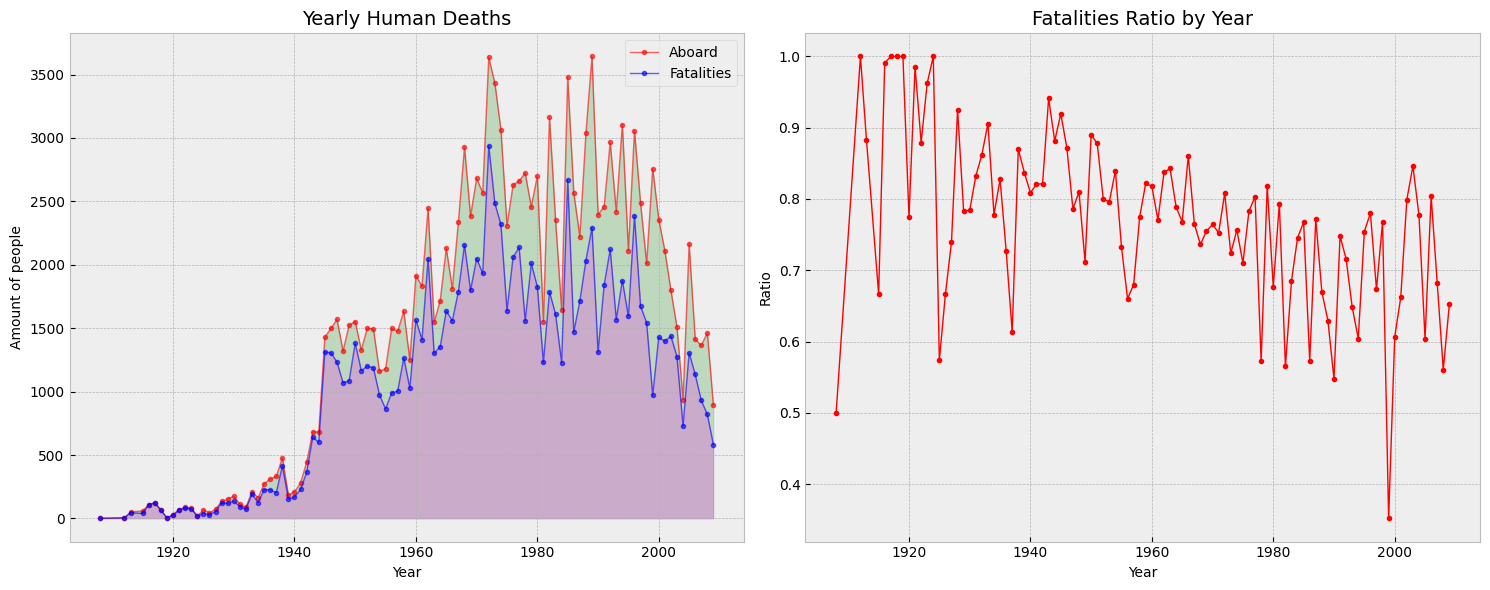

In [10]:
Fatalities = data.groupby(data.Time.dt.year).sum()
Fatalities['Proportion'] = Fatalities['Fatalities'] / Fatalities['Aboard']

plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
plt.fill_between(Fatalities.index, 'Aboard', data=Fatalities, color="green", alpha=0.2)
plt.plot(Fatalities.index, 'Aboard', data=Fatalities, marker = ".", color="red", alpha=0.6, linewidth=1)
plt.fill_between(Fatalities.index, 'Fatalities', data=Fatalities, color="magenta", alpha=0.2)
plt.plot(Fatalities.index, 'Fatalities', data=Fatalities, color="blue", marker = ".", alpha=0.6, linewidth=1)
plt.legend(fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Amount of people', fontsize=10)
plt.title('Yearly Human Deaths', loc='Center', fontsize=14)

plt.subplot(1, 2, 2)
plt.plot(Fatalities.index, 'Proportion', data=Fatalities, marker = ".", color = 'red', linewidth=1)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Ratio', fontsize=10)
plt.title('Fatalities Ratio by Year', loc='Center', fontsize=14)
plt.tight_layout()
plt.show()